# Week 2

## Data Preparation for Customer Behavior Analysis

#### Outline

- Exploratory Data Analysis
- Data Cleaning
- Feature Engineering 


Here's what a typical data science project looks like:
1. Problem identification
2. **EDA**
3. **Data Cleaning**
4. **Feature Engineering**
5. Modeling
6. Project Delivery 

During this class we will discuss and work on 2, 3 and 4 points from the list above.

### Exploratory Data Analysis:

*“Exploratory data analysis” is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there.*
<br>
— John Tukey
<br> 
<br>
During EDA, we use plots, graphs, and summary statistics to gain more understanding and intuition about the dataset. 
<br>
<br>
Generally speaking, it’s a method of systematically going through the data, plotting distributions of all variables (using box plots), plotting time series of data, transforming variables, looking at all pairwise relationships between variables using scatterplot matrices, and generating summary statistics for all of them. [1]
<br>
<br>
<br>
**A simple guide to help you conduct EDA:**
1. Dataset overview
    - Exploring summary statistics of variables
    - Exploring NAs
2. Going deeper by examining each variable individually
    - Visualisation of each variable 
    - Outlier detection
3. Exploring the interaction of two or more variables
    - Visualisation techniques
    - Correlation matrices 

<br>

**How to clean up a dataset:**  
1. Dealing with unuseful data
2. Dealing with NAs
3. Dealing with outliers

<br>

**Creating new features with Feature Engineering:**
1. Many new variables from datetime objects
2. Changing data type (e.g. continuous to categorical)
3. Creating dummy variables
4. Creating new variables using the sum, product, difference of two or more variables
5. Using your imagination for more 

<br>
<br>
Further you can find application to the methods and techniques described above. This is a general EDA and preprocessing analysis that can be used later for modeling. 

Link to dataset:
https://www.kaggle.com/carrie1/ecommerce-data

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."


In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import date
%matplotlib inline

In [2]:
# Data 
data = pd.read_csv('data.csv', engine='python')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Exploratory Data Analysis

##### <div align="center">  Data Description </div>        

| **Column Name** |     **Description**  |  
|----------       |:-------------:       |
| InvoiceNo       |  Invoice Number      |
| StockCode       |  Product code        |
| Description     |  Product description |
| Quantity        |  Number of purchased items |
| InvoiceDate     |  Invoice Date        |
| UnitPrice       |  Price for one item  |
| CustomerID      |  Customer ID         |
| Country         |  Customer's country  |

In [4]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Change data types 
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype('O')

In [6]:
# Describe numerical variables
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [7]:
# Describe categorical variables
data.describe(include = 'object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,541909,541909,540455,406829.0,541909
unique,25900,4070,4223,4372.0,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,1114,2313,2369,7983.0,495478


### 1.Dealing with NAs

In [8]:
# Number of NAs and Percentage of NAs in dataset
data_nas = pd.DataFrame(data.isna().sum(), columns=['Number of NAs'])
data_nas['Percentage of NAs'] = round(data_nas['Number of NAs'] / data.shape[0] *100, 3)
data_nas

,Number of NAs,Percentage of NAs
InvoiceNo,0,0.000
StockCode,0,0.000
Description,1454,0.268
Quantity,0,0.000
InvoiceDate,0,0.000
UnitPrice,0,0.000
CustomerID,135080,24.927
Country,0,0.000


The main goal of this EDA and future analysis is to understand the behavior of company customers, which is why we need to remove NAs in 'CustomerID' column. Moreover, by removing these values from 'Customer ID' we clean 'Description' NAs as well.

In [9]:
data.dropna(subset=['CustomerID'], inplace=True)

### 2. Exploring each variable separately

In [10]:
print("Numbers of observations: ", data.shape[0])
print("Numbers of unique invoices: ", data.InvoiceNo.nunique())
print('Number of unique customers: ', data.CustomerID.nunique())
print('Numbere of unique products:', data.StockCode.nunique())

Numbers of observations:  406829
Numbers of unique invoices:  22190
Number of unique customers:  4372
Numbere of unique products: 3684


Here we can see the huge difference between number of observations and numbers of unique orders, which means that database has no order level structure. 

##### Continuous data visualisation

Text(0.5, 0, 'Quantity')

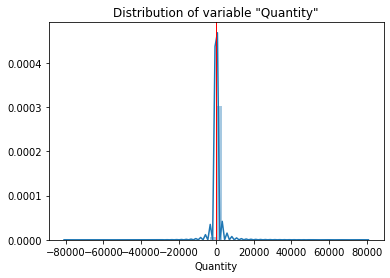

In [11]:
sns.distplot(data.Quantity)
plt.axvline(data.Quantity.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.Quantity.median(), color='r', linewidth=1)
plt.title('Distribution of variable "Quantity"')
plt.xlabel("Quantity")

Text(0.5, 0, 'UnitPrice')

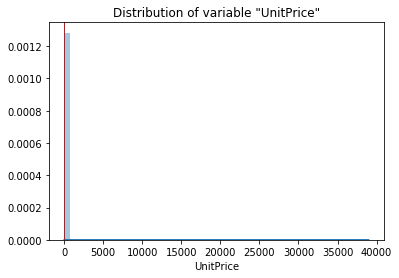

In [12]:
sns.distplot(data.UnitPrice)
plt.axvline(data.UnitPrice.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.UnitPrice.median(), color='r', linewidth=1)
plt.title('Distribution of variable "UnitPrice"')
plt.xlabel("UnitPrice")

Both of the above graphs show that we have outliers for both variables. We will explore them more deeply.

In [13]:
# Datetime variable
data['InvoiceDate'].describe()

count                  406829
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In analyzing customer behavior, date and time variables will play a major role in solving various types of problems. This will be useful later in the analysis of retention, loyalty, segmentation, etc. 

##### Categorical data visualisation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

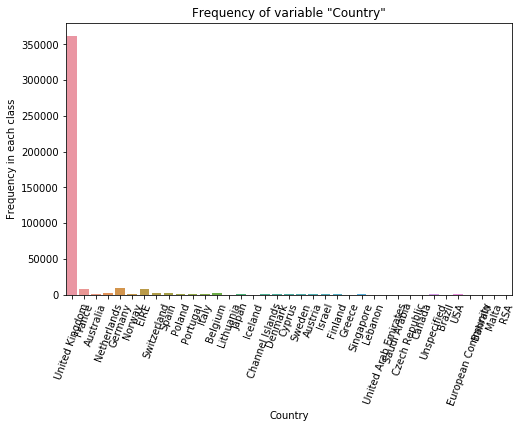

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data['Country'])
plt.title('Frequency of variable "Country"')
plt.xlabel("Country")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

Most customers are based in UK. From the point of view of the 'Country' variable, the data is highly imbalanced.
<br>
<br>
There is no need to visualize other categorical variables, because these variables have many unique values and we can't gain any valuable information from it.

### 3. Outlier detection

In [15]:
data.Quantity.describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [16]:
data.UnitPrice.describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

Text(0, 0.5, 'Quantity')

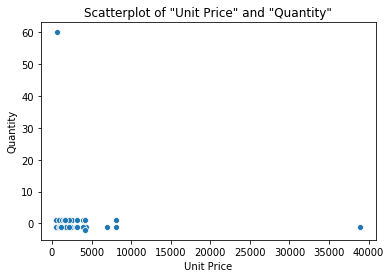

In [17]:
# Exploring large values  of 'UnitPrice' variable
larges = data[data['UnitPrice']>=500]
sns.scatterplot(larges['UnitPrice'], larges['Quantity'])
plt.title('Scatterplot of "Unit Price" and "Quantity"')
plt.xlabel("Unit Price")
plt.ylabel("Quantity")

In [18]:
#Let's look at categorical variables of this part of the data once again
larges.describe(include = 'object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,86,86,86,86.0,86
unique,82,6,6,33.0,9
top,571751,M,Manual,14096.0,United Kingdom
freq,2,59,59,18.0,49


In [19]:
# Unique values of 'StockCode' variable.
larges.StockCode.unique()

array(['M', 'D', 'POST', '22502', 'DOT', 'CRUK'], dtype=object)

In [20]:
# Unique values of 'Description' variable.
larges.Description.unique()

array(['Manual', 'Discount', 'POSTAGE', 'PICNIC BASKET WICKER 60 PIECES',
       'DOTCOM POSTAGE', 'CRUK Commission'], dtype=object)

**Some assumptions:**
1. From the plot above and from the description of the 'Quantity' variable, it is clear that we have a lot of data issues. First of all, the quantity variable cannot take a negative value. Moreover, our maximum value is very large. It is doubtful that a customer can buy the same product so many times. 
<br>
<br>
2. Next variable with outliers is 'UnitPrice'. The only problem with this is the very large values.To understand the reasons for their occurrence, we only consider observations at unit prices of 500 or more. Some interesting relations can be found:
    <br>
    2.1 High unit prices mostly have negative values for the Quantity variable. 
    <br>
    2.2 The variables 'StockCode 'and' Description 'show that these observations are basically not ordinary products.  
<br>
<br>

**What to do next:**
1. Remove negative and very large values from 'Quantity' variable.
2. Remove StockCode and Description values which do not apply to usual products.

In [21]:
# Remove negative values from 'Quantity' variable and very large values of 'Quantity' variable
filtered = data[data['Quantity'] >= 0]
filtered = filtered[filtered['Quantity']<5000]

In [22]:
# Remove not real product codes from StockCode and very large values of 'Unit Price' variable
vals = ['M', 'D', 'POST',  'DOT', 'CRUK']
filtered = filtered[~filtered['StockCode'].isin(vals)]

filtered = filtered[filtered['UnitPrice']<500]

### 4. Feature engineering

Creating new variables will help to find more relations in data. They may be used in later analysis as well.

In [23]:
filtered['TotalPrice'] = filtered['Quantity'] * filtered['UnitPrice']
filtered['OrderHour'] = filtered.InvoiceDate.dt.hour
filtered['OrderMonth'] = filtered.InvoiceDate.dt.month
filtered['OrderWeekday'] = filtered.InvoiceDate.dt.weekday_name


### 5. Exploring interaction of two or more variables

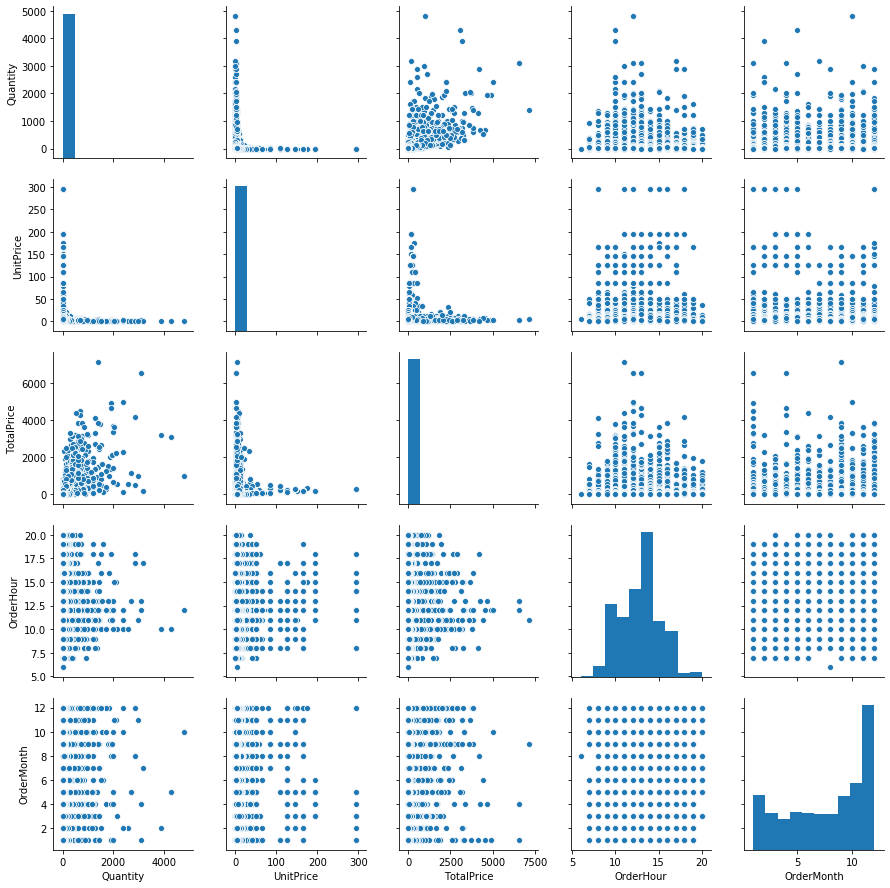

In [24]:
num_cols = ['Quantity', "UnitPrice", 'TotalPrice', 'OrderHour', 'OrderMonth']
sns.pairplot(filtered, vars = num_cols)

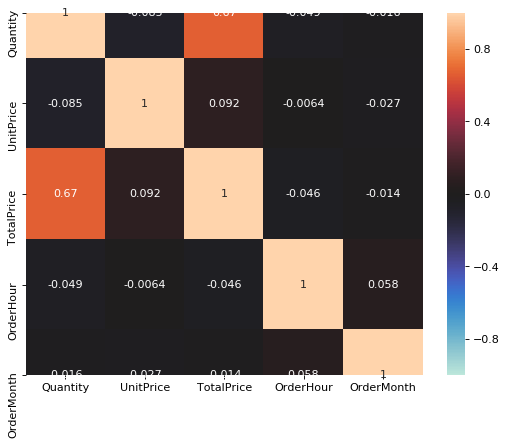

In [25]:
corr = filtered[num_cols].corr()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=corr)

The only relationship we can find is between Quantity and Total price, which has an obvious reason: TotalPrice was created from multiplying Quantity and Unit prices.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

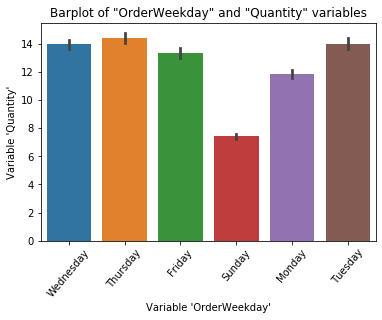

In [26]:
sns.barplot( x=filtered["OrderWeekday"], y = filtered["Quantity"] )
plt.title('Barplot of "OrderWeekday" and "Quantity" variables')
plt.xlabel("Variable 'OrderWeekday'")
plt.ylabel("Variable 'Quantity'")
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

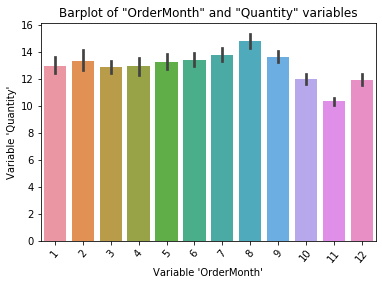

In [27]:
sns.barplot( x=filtered["OrderMonth"], y = filtered["Quantity"] )
plt.title('Barplot of "OrderMonth" and "Quantity" variables')
plt.xlabel("Variable 'OrderMonth'")
plt.ylabel("Variable 'Quantity'")
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

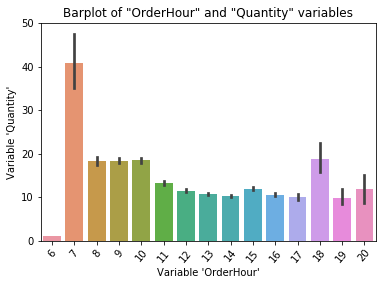

In [28]:
sns.barplot( x=filtered["OrderHour"], y = filtered["Quantity"] )
plt.title('Barplot of "OrderHour" and "Quantity" variables')
plt.xlabel("Variable 'OrderHour'")
plt.ylabel("Variable 'Quantity'")
plt.xticks(rotation=50)

The relation between time variables and 'Quantity' variable:

- Minimum order quantity reached on Sunday.
- November has the least quantity of ordered products. 
- Customers usually make purchases at 7am.

**Conclusion**

This is just an example of EDA and data preprocessing that you can conduct. You can dig deeper, find more relationships, add more data and everything you can think of. This is an art and you're the master!

More importantly, this is just the beginning. We will use this data, knowledge and intuition, which we obtained as a result of this analysis, to go further and solve many problems related to customer behavior.